# Understanding Photogrammetry & 2D -> 3D Modelling through Geometric Shapes 🔴


## Abstract

This report outlines the process and insights gained from creating and manipulating simple 3D geometric shapes to understand photogrammetry and 2D to 3D modeling. 

By constructing basic shapes such as cubes, stars, and pyramids, this research delves into the foundational steps for beginners in 3D modeling and photogrammetry, highlighting the techniques and tools used in the creation and refinement of simpler 3D models.

## Introduction

Photogrammetry and 2D to 3D modeling are crucial techniques in various fields, including computer graphics, architecture, and archaeology. 

For beginners, understanding these processes can be daunting. 

This research focuses on using simple geometric shapes to break down the basics of 3D modeling and photogrammetry, providing a practical approach to learning these concepts.


## Methodology

The methodology involved creating basic 3D shapes using Python, exporting them as STL files, and refining them using subdivision algorithms. 

The shapes chosen for this study include a cube, a star-shaped prism, and a pyramid, each offering unique insights into 3D modeling techniques.


## Tools and Libraries

- **Python:** Used for scripting and automation.
- **Numpy:** Utilized for numerical operations and defining vertices and faces of the shapes.
- **STL Library (numpy-stl):** Used for creating and saving STL files.
- **Trimesh Library:** Employed for mesh manipulation and applying subdivision algorithms for smoothing.

# Install numpy-stl

In [2]:
!pip3 install numpy-stl trimesh

   ---------------------------------------- 0.0/694.6 kB ? eta -:--:--
   -------- ------------------------------- 153.6/694.6 kB 4.5 MB/s eta 0:00:01
   ------------------------------------- -- 655.4/694.6 kB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 694.6/694.6 kB 7.3 MB/s eta 0:00:00


# Creating a Cube in STL format to import in Blender

In [ ]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

## Cube Visualization
The cube, being a fundamental shape, was created first. 

It involved defining eight vertices and twelve faces to form a mesh, which was then exported as an STL file. 

This process helped in understanding the basics of mesh creation and vertex manipulation.


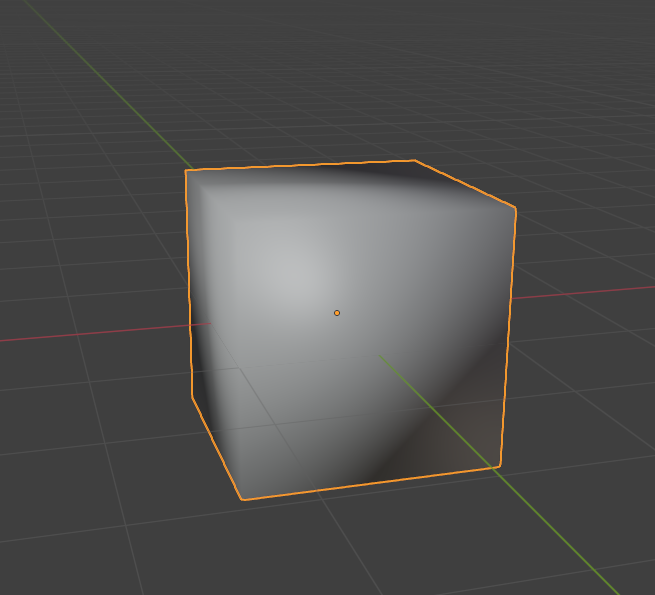

## Creating Star-Shaped Prism

In [ ]:
def create_star_vertices(radius1, radius2, height, num_points):
    vertices = []
    angle = np.pi / num_points
    for i in range(2 * num_points):
        r = radius1 if i % 2 == 0 else radius2
        x = r * np.cos(i * angle)
        y = r * np.sin(i * angle)
        vertices.append([x, y, 0])
        vertices.append([x, y, height])
    return vertices

def create_star_faces(num_points):
    faces = []
    # Lower base
    for i in range(num_points * 2):
        faces.append([i, (i + 1) % (num_points * 2), num_points * 2 * 2])
    # Upper base
    for i in range(num_points * 2):
        faces.append([(i + num_points * 2), ((i + 1) % (num_points * 2)) + num_points * 2, num_points * 2 * 2 + 1])
    # Sides
    for i in range(num_points * 2):
        faces.append([i, (i + 1) % (num_points * 2), (i + 1) % (num_points * 2) + num_points * 2])
        faces.append([i, (i + 1) % (num_points * 2) + num_points * 2, i + num_points * 2])
    return faces

# Define star parameters
radius1 = 1
radius2 = 0.5
height = 1
num_points = 5

# Create vertices and faces
vertices = create_star_vertices(radius1, radius2, height, num_points)
faces = create_star_faces(num_points)

# Append center points for bases
vertices.append([0, 0, 0])
vertices.append([0, 0, height])

# Convert to numpy arrays
vertices = np.array(vertices)
faces = np.array(faces)

# Create the mesh
star = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        star.vectors[i][j] = vertices[f[j]]

# Save the initial star shape
star.save('star_initial.stl')

# Load the mesh using trimesh for subdivision
star_mesh = trimesh.load_mesh('star_initial.stl')

# Apply Catmull-Clark subdivision
subdivided_mesh = star_mesh.subdivide()

# Save the smoothed mesh
subdivided_mesh.export('star_smoothed.stl')

# Star-Shaped Prism Visualization

Next, a more complex shape, the star-shaped prism, was created. 

This involved defining a set of vertices to form a star pattern and extruding it to create a 3D shape. 

This step introduced the concept of more intricate vertex and face definitions and the challenges in ensuring a correct and visually pleasing model.


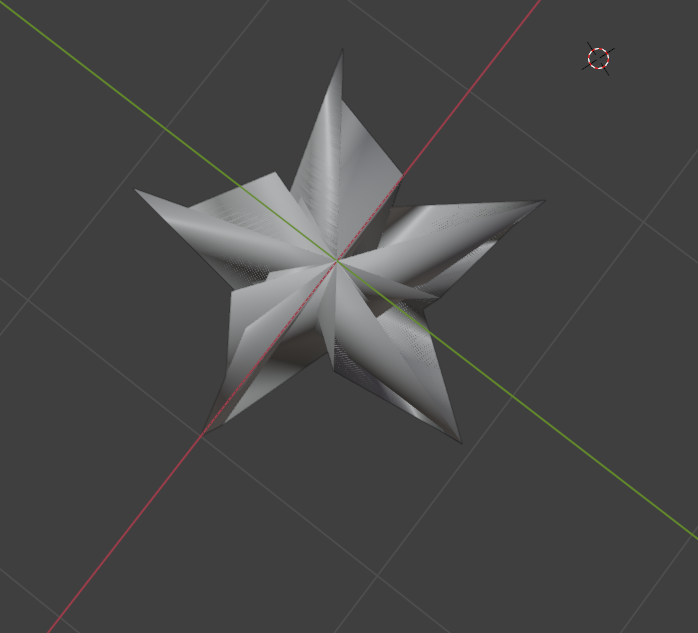



## Creating Pyramid with Base

In [ ]:
# Define the vertices of the pyramid
vertices = np.array([
    [0, 0, 1],    # Top vertex
    [-1, -1, 0],  # Base vertices
    [1, -1, 0],
    [1, 1, 0],
    [-1, 1, 0]
])

# Define the faces of the pyramid
faces = np.array([
    [0, 1, 2],  # Side faces
    [0, 2, 3],
    [0, 3, 4],
    [0, 4, 1],
    [1, 2, 3],  # Base face
    [1, 3, 4]
])

# Create the mesh
pyramid = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        pyramid.vectors[i][j] = vertices[f[j]]

# Save the initial pyramid shape
pyramid.save('pyramid_initial.stl')

# Load the mesh using trimesh for subdivision
pyramid_mesh = trimesh.load_mesh('pyramid_initial.stl')

# Apply Catmull-Clark subdivision
subdivided_mesh = pyramid_mesh.subdivide()

# Save the smoothed mesh
subdivided_mesh.export('pyramid_smoothed.stl')

# Pyramid Visualization

The pyramid, with its simple yet distinct structure, was then created. 

This shape helped in understanding the creation of non-rectangular base shapes and the construction of apex vertices connecting to a base.


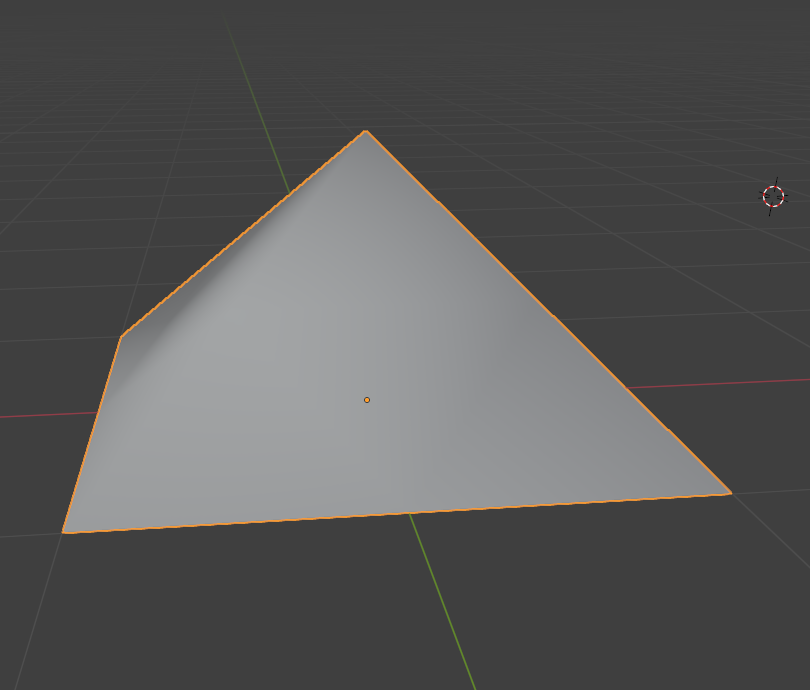



## Refining and Smoothing Shapes

To achieve smoother and more refined shapes, subdivision algorithms such as Catmull-Clark were applied using the Trimesh library. 

This step demonstrated how basic shapes could be enhanced to have smoother edges and more visually appealing surfaces, which is a crucial aspect of 3D modeling.

## Results

### Initial Shapes

The initial shapes created provided a hands-on understanding of how vertices and faces form the basis of 3D models. 

The cube, star-shaped prism, and pyramid each highlighted different aspects of 3D geometry and modeling techniques.

### Smoothed Shapes

Applying the Catmull-Clark subdivision algorithm resulted in smoother and more refined shapes. 

This process illustrated the importance of mesh refinement in creating high-quality 3D models, which is essential in photogrammetry and 3D modeling for realistic representations.


### Insights Gained

- **Fundamental Understanding:** Creating basic shapes from scratch provided a solid understanding of how 3D models are constructed from vertices and faces.

- **Mesh Refinement:** Learning to apply subdivision algorithms highlighted the importance of refining meshes to achieve smoother and more realistic models.

- **Practical Application:** The practical approach of creating and refining shapes made the theoretical concepts of photogrammetry and 3D modeling more tangible and understandable for beginners.

## Conclusion

The process of creating and refining simple geometric shapes proved to be an effective method for understanding the basics of photogrammetry and 2D to 3D modeling. 

Through hands-on practice, the foundational concepts were clarified, providing a strong starting point for further exploration and learning in the field of 3D modeling and photogrammetry.


## Future Work

Future research could involve applying these foundational techniques to more complex models and incorporating actual photogrammetry data to create detailed 3D representations from 2D images. 

Additionally, exploring other subdivision and refinement techniques could further enhance the quality and realism of 3D models.


## References

    Numpy Library: https://numpy.org/
    numpy-stl Library: https://github.com/WoLpH/numpy-stl
    Trimesh Library: https://trimsh.org/
    Blender: https://www.blender.org/

By engaging in this process, beginners can gain a practical and comprehensive understanding of the steps involved in creating and refining 3D models, paving the way for more advanced studies in photogrammetry and 3D modeling.